# **Laboratorio 2 - 1IEE06**

Guardar el Notebook de Google Colab con el siguiente formato: CódigoPUCP.ipynb


### Pregunta 1 (10 puntos)

Implementar en C un programa que ejecuta la función _downsampling_ en un factor $D=2$ de un arreglo bidimensional.

Entrada:

$$
\left(\begin{array}{cc}
0 & 1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 & 9 \\
10 & 11 & 12 & 13 & 14 \\
15 & 16 & 17 & 18 & 19 \\
20 & 21 & 22 & 23 & 24 \\
\end{array}\right)
$$

Salida:

$$
\left(\begin{array}{cc}
0 & 2 & 4 \\
10 & 12 & 14 \\
20 & 22 & 24 \\
\end{array}\right)
$$

##Indicaciones:

* Los arreglos deben ser números enteros de 32 bits.

* Los tamaños de los arreglos bidimensionales son de la forma $2N+1$.

* Presentar a sus JPs los resultados para $N=2$ y $N=4$. Puede presentar sus resultados en Colab o Como archivos .c + un archivo .pdf con la evidencia.

* Medir los tiempos de ejecución para valores de $N = {2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048}$. Resumir sus resultados en una tabla, adjuntar las capturas de pantalla que muestran sus mediciones, y realizar comentarios de la experiencia.

##Rúbrica de calificación:

* Presentación del tercer inciso (5 puntos).

* Presentación de la tabla (3 puntos).

* Comentarios teóricos (2 puntos).

### Pregunta 2 (10 puntos)

Un conjunto de $N$ vectores de $R^N$ constituye una base válida para dicho espacio vectorial si es que son linealmente independientes entre sí. En ocasiones, es deseable disponer de **bases ortonormales** (vectores ortogonales entre sí y de norma unitaria), para lo cual, se dispone del algoritmo *Gram-Schmidt*.

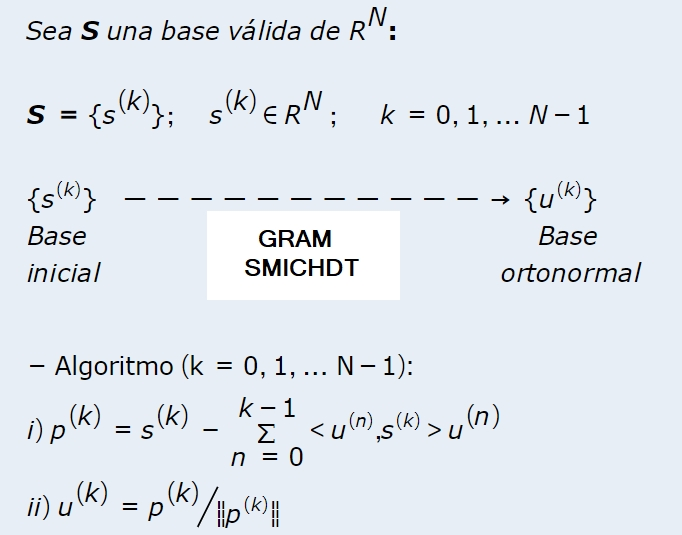


Implementar en C el algoritmo *Gram-Schmidt*, el cual se utiliza para generar una base ortonormal a partir de una base inicial válida (vectores linealmente independientes). El programa recibe un único argumento de entrada ingresado desde el terminal, el cual representa el valor de $N$.

a) **(0.5 p)** Implementar función `gen_base()`, la cual genera una matriz de dimensiones $NxN$, cuyos elementos son números aleatorios en el rango de $[0,10[$. Para obtener genera números aleatorios, utilizar la función `rand()`

```
void gen_base(float **matrix, int N);
```



b) **(0.5 p)** Implementar la función `print_base()`, la cual imprime $N$ vectores de $N$ elementos a partir de la matriz creada en el ítem anterior, considerando el siguiente formato (los valores son solo referenciales):

\begin{equation}
s^{(0)} = [ 9.000000\; 4.000000 ]\\
s^{(1)} = [ 5.000000\; 3.000000 ]
\end{equation}

```
void print_base(float **matrix, int N);
```

c) **(1 p)** Implementar la función `dot_product()`, la cual calcula y retorna el producto punto de 2 vectores de $N$ elementos.

```
float dot_product(float *v1, float *v2, int N);
```

d) **(1 p)** Implementar la función `scaling_vector()`, la cual recibe un vector arbitrario de $N$ elementos, escala dicho vector mediante un factor $a$ y almacena el vector escalado en un nuevo vector.



```
void scaling_vector(float a, float *v_in, float *v_out, int N);

************************************
INPUT
************************************
a: factor de escalamiento
v_in: vector de entrada (original)
v_out: vector de salida (escalado)
N: # de elementos del arreglo

```



e) **(1 p)** Implementar la función `diff_vector()`, la cual calcula la diferencia entre un par de vectores de $N$ elementos y la almacena en el segundo vector.


```
void diff_vector(float *v1, float *v2, int N); // v2 = v2-v1

************************************
INPUT
************************************
v1: vector 1
v2: vector 2
N: # de elementos del arreglo

NOTA: en v2 se sobreescribe el valor de la diferencia (v2-v1)

```



f) **(1 p)** Implementar la función `unit_vector()`, la cual recibe un vector arbitrario de $N$ elementos, obtiene el vector unitario correspondiente y lo almacena en otro vector.

```
void unit_vector(float *v, float *v_unit,int N); // v_unit = v/|v|
```


g) **(0.5 p)** Implementar la función `valida_base()`, la cual calcula el determinante de una matriz y dependiendo del resultado, determina si los vectores de la base son linealmente independientes o no.

```
int valida_base(float **matrix, int N){

    float determinante;
    int flag_base = 1;

    if (N == 2){
        determinante = ; // falta completar
    }
    else if (N == 3){
        determinante = ; // falta completar
    }

    if (((int) determinante) == 0){
        flag_base = 0;
    }

    if (flag_base == 0){
        printf("Los vectores base NO SON LINEALMENTE INDEPENDIENTES -> La base NO es válida\n");
    }
    else{
        printf("Los vectores base SON LINEALMENTE INDEPENDIENTES -> La base es válida\n");
    }

    return flag_base;
}
```



h) **(2.5 p)** Implementar la función `GS_algorithm()`, la cual recibe una base arbitraria válida ($N$ vectores de $N$ elementos) y genera una base ortonormal a partir de la misma. Para ello debe hacer uso de las funciones creadas en los ítems c), d), e) y f)

```
void GS_algoritmo(float **base_inicial, float **base_final, int N);
```

*NOTA*: Dicha función corresponde con el algoritmo *Gram-Schmidt*, por lo que debe tener en cuenta los pasos del algoritmo planteado para su implementación.

i) **(1 p)** Finalmente, se proporciona el prototipo del programa total. Complete este prototipo una vez que haya implementado las funciones solicitadas y obtenga un código funcional que permita obtener los resultados deseados.

In [4]:
%%file gram_smichdt.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>

#define N_MAX 10

void gen_base(float **matrix, int N);
void print_base(float **matrix, int N);
float dot_product(float *v1, float *v2, int N);
void scaling_vector(float a, float *v_in, float *v_out, int N); // v_out = a*v_in
void diff_vector(float *v1, float *v2, int N); // v2 = v2 - v1
void unit_vector(float *v, float *v_unit, int N); // v_unit = v/|v|
int valida_base(float **matrix, int N);
void GS_algoritmo(float **base_inicial, float **base_final, int N);

int main(int argc, char* argv[]){

    srand(time(NULL));
    int N = atoi(argv[1]);

    float **base_inicial;

    /*
    reservar memoria dinámica para el doble puntero 'base_inicial'
    */

    float **base_final;

    /*
    reservar memoria dinámica para el doble puntero 'base_final'
    */

    gen_base(base_inicial, N);

    printf("Base inicial:\n");
    print_base(base_inicial, N);

    GS_algoritmo(base_inicial, base_final, N);

    int flag_base =  valida_base(base_inicial, N);

    if (flag_base){
        printf("Base final:\n");
        print_base(base_final, N);
    }
    else{
        printf("No es posible aplicar el algoritmo Gram-Smichdt");
    }

    return 0;
}

void gen_base(float **matrix, int N){
  // completar
}

void print_base(float **matrix, int N){
  // completar
}

float dot_product(float *v1, float *v2, int N){
  // completar
}

void scaling_vector(float a, float *v_in, float *v_out, int N){ // v_out = a*v_in
  // completar
}

void diff_vector(float *v1, float *v2, int N){ // v2 = v2 - v1
  // completar
}

void unit_vector(float *v, float *v_unit, int N){ // v_unit = v/|v|
  // completar
}

int valida_base(float **matrix, int N){
  // completar
}

void GS_algoritmo(float **base_inicial, float **base_final, int N){
  // completar
}

Writing gram_smichdt.c


In [ ]:
# compilamos y generamos el ejecutable
! gcc gram_smichdt.c -o gram_smichdt -lm

j) **(1 p)** Mostrar sus resultados para N = 2

In [ ]:
# 3 ejecuciones para N = 2

! ./gram_smichdt 2
! ./gram_smichdt 2
! ./gram_smichdt 2

k) **(1 p)** Mostrar sus resultados para N = 3

In [ ]:
# 3 ejecuciones para N = 3

! ./gram_smichdt 3
! ./gram_smichdt 3
! ./gram_smichdt 3

##Indicaciones:

* Utilizar punteros dobles (matrices) y punteros simples (vectores), mas no arreglos.

* Utilizar el concepto de memoria dinámica para reservar espacios de memoria (funciones *calloc*, *malloc*) de acuerdo a lo requerido en función de las estructuras de datos utilizadas.

* Los elementos de los vectores deben ser números de precisión simple (variables *float*).

* Presentar resultados para $N=2$ y $N=3$. Considerar 3 ejecuciones para cada valor de N al mostrar sus resultados, de tal manera de verificar el correcto funcionamiento el programa.

